In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1-112wLCqMHffscOo6hilw3bK5pS3-fMl/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1ZKu6_OakkqJjlwOySM-CdjV9fwtHcEQ4/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1-112wLCqMHffscOo6hilw3bK5pS3-fMl
To: /content/test_data_SYN.npz
100% 18.6M/18.6M [00:00<00:00, 52.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZKu6_OakkqJjlwOySM-CdjV9fwtHcEQ4
To: /content/train_data_SYN.npz
100% 18.7M/18.7M [00:00<00:00, 126MB/s] 


In [3]:
import numpy as np
from typing import Tuple
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
# Load the data and label
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['data'], data['labels']

# Split the data and labels into training and testing sets

train_data, train_labels = load_data('train_data_SYN.npz')

print(train_data.shape)
print(np.unique(train_labels, return_counts=True))

test_data, test_labels = load_data('test_data_SYN.npz')

print(test_data.shape)
print(np.unique(test_labels, return_counts=True))

(5000, 1024)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([563, 633, 529, 482, 486, 456, 504, 486, 442, 419]))
(5000, 1024)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([483, 539, 539, 484, 490, 526, 483, 506, 471, 479]))


P1-GridSearch

{'C': 10, 'gamma': 'auto'}
Accuracy: 0.8918


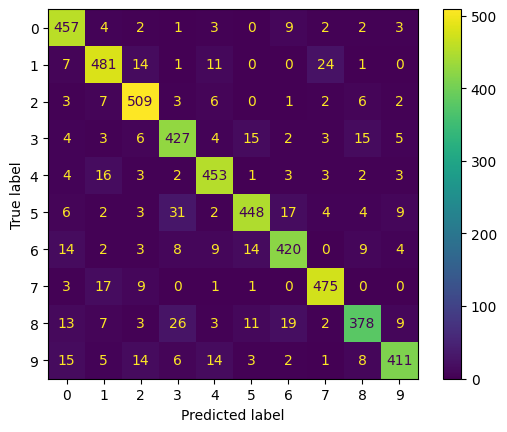

In [ ]:

# Define the hyperparameters to tune
param_grid = {'C': [1, 10, 50, 100], 'gamma': [0.01, 0.1, 1, 10, 'auto']}

# Create an instance of the SVM classifier
svc = SVC()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(svc, param_grid, scoring=make_scorer(accuracy_score), cv=5)

# Fit the model to data
grid_search.fit(train_data, train_labels)

# Print the best hyperparameters found by GridSearchCV
print(grid_search.best_params_)

# Train model on the training data and labels using the best hyperparameters
svc_best = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svc_best.fit(train_data, train_labels)

# Predict the labels of the test data using the best model
predicted_labels = svc_best.predict(test_data)

# Calculate the accuracy of model on the test data and ploting the results
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()


P2-TestingSVMParameters

C =  1
Accuracy: 0.899
C =  2
Accuracy: 0.904
C =  4
Accuracy: 0.9036
C =  8
Accuracy: 0.902
C =  16
Accuracy: 0.9018
C =  32
Accuracy: 0.9018
C =  64
Accuracy: 0.9018
C =  2
Accuracy: 0.904


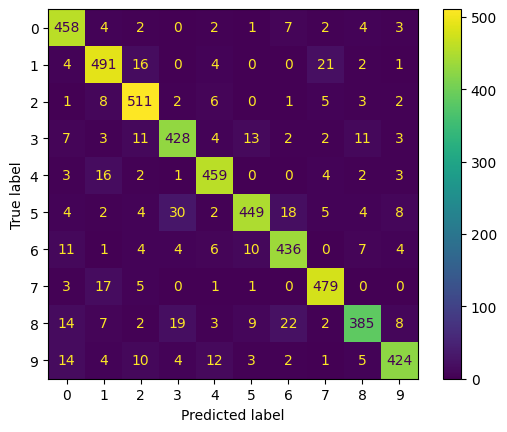

In [5]:
i = 1
max = 0
maxC = 0
while i <= 100:
  print("C = ", i)
  svc_best = SVC(C=i)
  svc_best.fit(train_data, train_labels)

  # Predict the labels of the test data using the best model
  predicted_labels = svc_best.predict(test_data)

  # Calculate the accuracy of model on the test data and ploting the results
  accuracy = accuracy_score(test_labels, predicted_labels)
  if(accuracy > max):
    maxC = i
    max = accuracy
  print("Accuracy:", accuracy)
  i *= 2
print("C = ", maxC)
svc_best = SVC(C=maxC)
svc_best.fit(train_data, train_labels)
predicted_labels = svc_best.predict(test_data)
print("Accuracy:", max)
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

Epoch 1/10
157/157 [==============================] - 2s 6ms/step - loss: 0.9531 - accuracy: 0.7044 - val_loss: 0.6198 - val_accuracy: 0.8124
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8882 - val_loss: 0.5054 - val_accuracy: 0.8438
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2616 - accuracy: 0.9238 - val_loss: 0.4373 - val_accuracy: 0.8642
Epoch 4/10
157/157 [==============================] - 1s 4ms/step - loss: 0.1986 - accuracy: 0.9488 - val_loss: 0.4425 - val_accuracy: 0.8638
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.1536 - accuracy: 0.9640 - val_loss: 0.4149 - val_accuracy: 0.8702
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9788 - val_loss: 0.4214 - val_accuracy: 0.8722
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0956 - accuracy: 0.9820 - val_loss: 0.4252 - val_accuracy: 0.8700
Epoch 

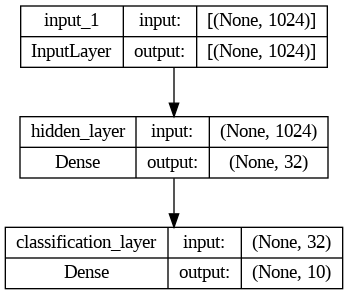

In [ ]:
input_tensor = tf.keras.Input(shape=(1024,))

hidden_size = 32
reg_l1_param = 10e-5

hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                       name = 'hidden_layer',
                                       activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('reg_l1_param:', reg_l1_param, ' hidden_size:', hidden_size, ' Test accuracy:', test_acc)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

P3-NeuralNetworkParameterTuning

In [ ]:
input_tensor = tf.keras.Input(shape=(1024,))

hidden_sizez = [8,16,32,48,64]
reg_l1_param = 10e-5
for hidden_size in hidden_sizez:
  hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                         name = 'hidden_layer',
                                         activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

  output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)

  model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))
  test_loss, test_acc = model.evaluate(test_data, test_labels)

  print('reg_l1_param:', reg_l1_param, ' hidden_size:', hidden_size, ' Test accuracy:', test_acc)

  # Plot the model architecture
  plot_model(model, to_file='model.png', show_shapes=True)

Epoch 1/10
157/157 [==============================] - 1s 5ms/step - loss: 1.6074 - accuracy: 0.4432 - val_loss: 1.3272 - val_accuracy: 0.5466
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.8762 - accuracy: 0.7206 - val_loss: 0.8977 - val_accuracy: 0.7122
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.5911 - accuracy: 0.8272 - val_loss: 0.6988 - val_accuracy: 0.7864
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.4571 - accuracy: 0.8676 - val_loss: 0.5979 - val_accuracy: 0.8182
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8888 - val_loss: 0.5535 - val_accuracy: 0.8284
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3191 - accuracy: 0.9090 - val_loss: 0.5298 - val_accuracy: 0.8420
Epoch 7/10
157/157 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.9216 - val_loss: 0.5099 - val_accuracy: 0.8436
Epoch 

In [ ]:
input_tensor = tf.keras.Input(shape=(1024,))

hidden_size = 64
reg_l1_params = [10e-5,5*10e-5,10e-4,5*10e-4,10e-3]
for reg_l1_param in reg_l1_params:
  hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                         name = 'hidden_layer',
                                         activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

  output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)

  model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))
  test_loss, test_acc = model.evaluate(test_data, test_labels)

  print('reg_l1_param:', reg_l1_param, ' hidden_size:', hidden_size, ' Test accuracy:', test_acc)

  # Plot the model architecture
  plot_model(model, to_file='model.png', show_shapes=True)

Epoch 1/10
157/157 [==============================] - 2s 6ms/step - loss: 0.8060 - accuracy: 0.7408 - val_loss: 0.5477 - val_accuracy: 0.8264
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3247 - accuracy: 0.9038 - val_loss: 0.4533 - val_accuracy: 0.8598
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2148 - accuracy: 0.9440 - val_loss: 0.4238 - val_accuracy: 0.8640
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1525 - accuracy: 0.9658 - val_loss: 0.4222 - val_accuracy: 0.8686
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1057 - accuracy: 0.9806 - val_loss: 0.4538 - val_accuracy: 0.8630
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0786 - accuracy: 0.9896 - val_loss: 0.4210 - val_accuracy: 0.8734
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9948 - val_loss: 0.4349 - val_accuracy: 0.8748
Epoch 

Epoch 1/10
157/157 [==============================] - 2s 7ms/step - loss: 0.8623 - accuracy: 0.7426 - val_loss: 0.5899 - val_accuracy: 0.8380
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.3728 - accuracy: 0.9090 - val_loss: 0.4969 - val_accuracy: 0.8566
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2649 - accuracy: 0.9474 - val_loss: 0.4762 - val_accuracy: 0.8634
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2007 - accuracy: 0.9684 - val_loss: 0.4775 - val_accuracy: 0.8644
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1512 - accuracy: 0.9824 - val_loss: 0.4480 - val_accuracy: 0.8776
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1206 - accuracy: 0.9934 - val_loss: 0.4453 - val_accuracy: 0.8804
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0975 - accuracy: 0.9972 - val_loss: 0.4393 - val_accuracy: 0.8800
Epoch 

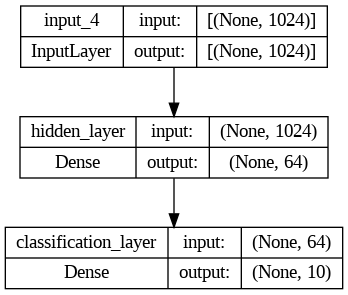

In [ ]:
input_tensor = tf.keras.Input(shape=(1024,))

hidden_size = 64
reg_l1_param = 10e-4
hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                      name = 'hidden_layer',
                                      activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('reg_l1_param:', reg_l1_param, ' hidden_size:', hidden_size, ' Test accuracy:', test_acc)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)



P4-FindingBestFeatures

Epoch 1/10
157/157 [==============================] - 5s 18ms/step - loss: 1.2843 - accuracy: 0.6250 - val_loss: 0.9462 - val_accuracy: 0.7290
Epoch 2/10
157/157 [==============================] - 4s 27ms/step - loss: 0.6071 - accuracy: 0.8592 - val_loss: 0.7104 - val_accuracy: 0.8154
Epoch 3/10
157/157 [==============================] - 2s 14ms/step - loss: 0.4613 - accuracy: 0.9022 - val_loss: 0.6235 - val_accuracy: 0.8382
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3841 - accuracy: 0.9282 - val_loss: 0.5874 - val_accuracy: 0.8518
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3291 - accuracy: 0.9462 - val_loss: 0.5702 - val_accuracy: 0.8560
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2915 - accuracy: 0.9552 - val_loss: 0.5703 - val_accuracy: 0.8572
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2541 - accuracy: 0.9670 - val_loss: 0.5550 - val_accuracy: 0.8584


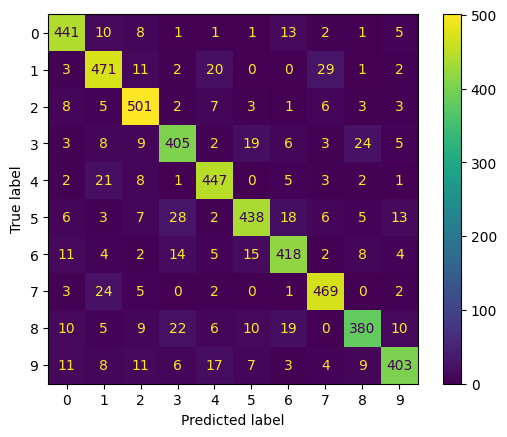

In [7]:
new_train_data = train_data
new_test_data = test_data
svm_train_data = None
svm_test_data = None
feature = 1024
max_score = 0
max_train_data = None
max_test_data = None
for i in range(7):
  input_tensor = tf.keras.Input(shape=(feature,))
  hidden_size = 16
  reg_l1_param = 0.005
  hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu, name = 'hidden_layer', activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)
  output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)
  model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(new_train_data, train_labels, epochs=10, batch_size=32, validation_data=(new_test_data, test_labels))
  input_to_hidden_weights = model.layers[1].get_weights()[0]
  feature_importance = np.mean(np.abs(input_to_hidden_weights), axis=1)
  top_features_indices = np.argsort(feature_importance)[-20:]
  if svm_train_data is not None:
    add_train_data = new_train_data[:, top_features_indices]
    svm_train_data = np.concatenate((add_train_data, svm_train_data), axis=1)
    add_test_data = new_test_data[:, top_features_indices]
    svm_test_data = np.concatenate((add_test_data, svm_test_data), axis=1)
  else:
    svm_train_data = new_train_data[:, top_features_indices]
    svm_test_data = new_test_data[:, top_features_indices]
  new_train_data = np.delete(new_train_data, top_features_indices, axis=1)
  new_test_data = np.delete(new_test_data, top_features_indices, axis=1)
  feature -= 20
  print('--------------------------------------------------------------------------------------------------------------------')
  svc_best = SVC(C=50)
  svc_best.fit(svm_train_data,train_labels)
  predicted_labels = svc_best.predict(svm_test_data)
  accuracy = accuracy_score(test_labels, predicted_labels)
  print("C = 50, feauters number = ", 1024 - feature)
  print("Accuracy:  ", accuracy)
  penalti = 0.00075 * (1024 - feature)
  print("Penalties: ", penalti)
  score = accuracy - penalti
  print("Score:     ", score)
  if score >= max_score:
    max_score = score
    max_train_data = svm_train_data
    max_test_data = svm_test_data
  print('********************************************************************************************************************')
print("MAX Score = ", max_score)
print("MAX Score Train Data has a shape of ", max_train_data.shape)
svc_best = SVC(C=50)
svc_best.fit(max_train_data,train_labels)
predicted_labels = svc_best.predict(max_test_data)
accuracy = accuracy_score(test_labels, predicted_labels)
print("C = 50")
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

Epoch 1/10
157/157 [==============================] - 3s 13ms/step - loss: 1.2986 - accuracy: 0.6102 - val_loss: 0.9581 - val_accuracy: 0.7516
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.6301 - accuracy: 0.8584 - val_loss: 0.6919 - val_accuracy: 0.8300
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.9070 - val_loss: 0.6186 - val_accuracy: 0.8458
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.3942 - accuracy: 0.9314 - val_loss: 0.5899 - val_accuracy: 0.8506
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.9456 - val_loss: 0.5497 - val_accuracy: 0.8642
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2957 - accuracy: 0.9580 - val_loss: 0.5526 - val_accuracy: 0.8558
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2619 - accuracy: 0.9682 - val_loss: 0.5345 - val_accuracy: 0.8638
Epoch

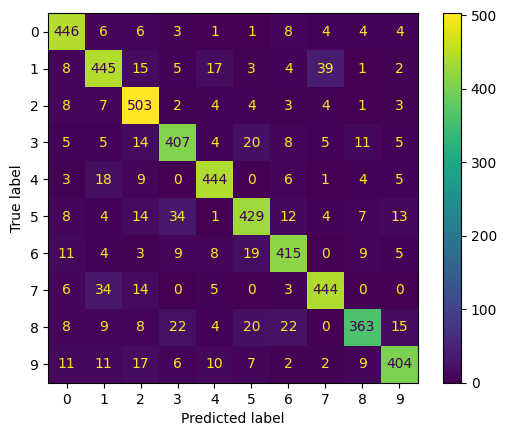

In [8]:
new_train_data = train_data
new_test_data = test_data
svm_train_data = None
svm_test_data = None
feature = 1024
max_score = 0
max_train_data = None
max_test_data = None
for i in range(12):
  input_tensor = tf.keras.Input(shape=(feature,))
  hidden_size = 16
  reg_l1_param = 0.005
  hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu, name = 'hidden_layer', activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)
  output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)
  model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(new_train_data, train_labels, epochs=10, batch_size=32, validation_data=(new_test_data, test_labels))
  input_to_hidden_weights = model.layers[1].get_weights()[0]
  feature_importance = np.mean(np.abs(input_to_hidden_weights), axis=1)
  top_features_indices = np.argsort(feature_importance)[-10:]
  if svm_train_data is not None:
    add_train_data = new_train_data[:, top_features_indices]
    svm_train_data = np.concatenate((add_train_data, svm_train_data), axis=1)
    add_test_data = new_test_data[:, top_features_indices]
    svm_test_data = np.concatenate((add_test_data, svm_test_data), axis=1)
  else:
    svm_train_data = new_train_data[:, top_features_indices]
    svm_test_data = new_test_data[:, top_features_indices]
  new_train_data = np.delete(new_train_data, top_features_indices, axis=1)
  new_test_data = np.delete(new_test_data, top_features_indices, axis=1)
  feature -= 10
  print('--------------------------------------------------------------------------------------------------------------------')
  svc_best = SVC(C=50)
  svc_best.fit(svm_train_data,train_labels)
  predicted_labels = svc_best.predict(svm_test_data)
  accuracy = accuracy_score(test_labels, predicted_labels)
  print("C = 50, feauters number = ", 1024 - feature)
  print("Accuracy:  ", accuracy)
  penalti = 0.00075 * (1024 - feature)
  print("Penalties: ", penalti)
  score = accuracy - penalti
  print("Score:     ", score)
  if score >= max_score:
    max_score = score
    max_train_data = svm_train_data
    max_test_data = svm_test_data
  print('********************************************************************************************************************')
print("MAX Score = ", max_score)
print("MAX Score Train Data has a shape of ", max_train_data.shape)
svc_best = SVC(C=50)
svc_best.fit(max_train_data,train_labels)
predicted_labels = svc_best.predict(max_test_data)
accuracy = accuracy_score(test_labels, predicted_labels)
print("C = 50")
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

Epoch 1/10
157/157 [==============================] - 2s 9ms/step - loss: 1.2990 - accuracy: 0.6004 - val_loss: 0.8693 - val_accuracy: 0.7742
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.5962 - accuracy: 0.8662 - val_loss: 0.6777 - val_accuracy: 0.8294
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.4617 - accuracy: 0.9060 - val_loss: 0.6090 - val_accuracy: 0.8470
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3859 - accuracy: 0.9302 - val_loss: 0.5746 - val_accuracy: 0.8524
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.9446 - val_loss: 0.5714 - val_accuracy: 0.8522
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2923 - accuracy: 0.9574 - val_loss: 0.5541 - val_accuracy: 0.8540
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.9656 - val_loss: 0.5335 - val_accuracy: 0.8612
Epoch 

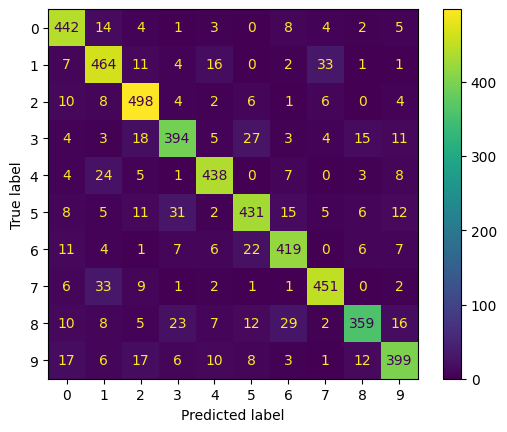

In [10]:
new_train_data = train_data
new_test_data = test_data
svm_train_data = None
svm_test_data = None
feature = 1024
max_score = 0
max_train_data = None
max_test_data = None
for i in range(5):
  input_tensor = tf.keras.Input(shape=(feature,))
  hidden_size = 16
  reg_l1_param = 0.005
  hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu, name = 'hidden_layer', activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)
  output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name = 'classification_layer')(hidden_layer_1)
  model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(new_train_data, train_labels, epochs=10, batch_size=32, validation_data=(new_test_data, test_labels))
  input_to_hidden_weights = model.layers[1].get_weights()[0]
  feature_importance = np.mean(np.abs(input_to_hidden_weights), axis=1)
  top_features_indices = np.argsort(feature_importance)[-30:]
  if svm_train_data is not None:
    add_train_data = new_train_data[:, top_features_indices]
    svm_train_data = np.concatenate((add_train_data, svm_train_data), axis=1)
    add_test_data = new_test_data[:, top_features_indices]
    svm_test_data = np.concatenate((add_test_data, svm_test_data), axis=1)
  else:
    svm_train_data = new_train_data[:, top_features_indices]
    svm_test_data = new_test_data[:, top_features_indices]
  new_train_data = np.delete(new_train_data, top_features_indices, axis=1)
  new_test_data = np.delete(new_test_data, top_features_indices, axis=1)
  feature -= 30
  print('--------------------------------------------------------------------------------------------------------------------')
  svc_best = SVC(C=50)
  svc_best.fit(svm_train_data,train_labels)
  predicted_labels = svc_best.predict(svm_test_data)
  accuracy = accuracy_score(test_labels, predicted_labels)
  print("C = 50, feauters number = ", 1024 - feature)
  print("Accuracy:  ", accuracy)
  penalti = 0.00075 * (1024 - feature)
  print("Penalties: ", penalti)
  score = accuracy - penalti
  print("Score:     ", score)
  if score >= max_score:
    max_score = score
    max_train_data = svm_train_data
    max_test_data = svm_test_data
  print('********************************************************************************************************************')
print("MAX Score = ", max_score)
print("MAX Score Train Data has a shape of ", max_train_data.shape)
svc_best = SVC(C=50)
svc_best.fit(max_train_data,train_labels)
predicted_labels = svc_best.predict(max_test_data)
accuracy = accuracy_score(test_labels, predicted_labels)
print("C = 50")
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()